In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt

In [2]:
A_train = pd.read_csv("classificationA.train", sep  = "\t", names=["X1","X2","Y"])
B_train = pd.read_csv("classificationB.train", sep  = "\t", names=["X1","X2","Y"])
C_train = pd.read_csv("classificationC.train", sep  = "\t", names=["X1","X2","Y"])

A_test = pd.read_csv("classificationA.test", sep  = "\t", names=["X1","X2","Y"])
B_test = pd.read_csv("classificationB.test", sep  = "\t", names=["X1","X2","Y"])
C_test = pd.read_csv("classificationC.test", sep  = "\t", names=["X1","X2","Y"])

In [3]:
N_A = A_train.Y.sum()
n_A = A_train.Y.size

N_B = B_train.Y.sum()
n_B = B_train.Y.size

N_C = C_train.Y.sum()
n_C = C_train.Y.size

## Estimateur $\Pi$

In [4]:
Pi_A = N_A/n_A
Pi_B = N_B/n_B
Pi_C = N_C/n_C

## Estimateur $\mu$

In [5]:
mu0_A = A_train[['X1','X2']].mul(1-A_train.Y, axis=0).sum()/(n_A-N_A)
mu1_A = A_train[['X1','X2']].mul(A_train.Y, axis=0).sum()/N_A

mu0_B = B_train[['X1','X2']].mul(1-B_train.Y, axis=0).sum()/(n_B-N_B)
mu1_B = B_train[['X1','X2']].mul(B_train.Y, axis=0).sum()/N_B

mu0_C = C_train[['X1','X2']].mul(1-C_train.Y, axis=0).sum()/(n_C-N_C)
mu1_C = C_train[['X1','X2']].mul(C_train.Y, axis=0).sum()/N_C

## Estimateur $\Sigma$

In [6]:
Centered_A_train_0 = (A_train[['X1','X2']]-mu0_A).mul(1-A_train.Y, axis=0)
Centered_B_train_0 = (B_train[['X1','X2']]-mu0_B).mul(1-B_train.Y, axis=0)
Centered_C_train_0 = (C_train[['X1','X2']]-mu0_C).mul(1-C_train.Y, axis=0)

Centered_A_train_1 = (A_train[['X1','X2']]-mu1_A).mul(A_train.Y, axis=0)
Centered_B_train_1 = (B_train[['X1','X2']]-mu1_B).mul(B_train.Y, axis=0)
Centered_C_train_1 = (C_train[['X1','X2']]-mu1_C).mul(C_train.Y, axis=0)

In [7]:
Sigma_A_0 = Centered_A_train_0.T.dot(Centered_A_train_0)/(n_A-N_A)
Sigma_A_1 = Centered_A_train_1.T.dot(Centered_A_train_1)/N_A

Sigma_B_0 = Centered_B_train_0.T.dot(Centered_B_train_0)/(n_B-N_B)
Sigma_B_1 = Centered_B_train_1.T.dot(Centered_B_train_1)/N_B

Sigma_C_0 = Centered_C_train_0.T.dot(Centered_C_train_0)/(n_C-N_C)
Sigma_C_1 = Centered_C_train_1.T.dot(Centered_C_train_1)/N_C

Sigma_A_0

,X1,X2
X1,2.310653,-1.047485
X2,-1.047485,0.575784


## Plot

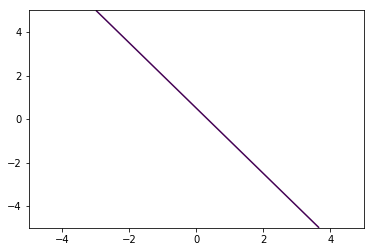

In [8]:
y,x=np.ogrid[-5:5:100j,-5:5:100j]
plt.contour(x.ravel(),y.ravel(),3*x+2*y,[1])
plt.show()

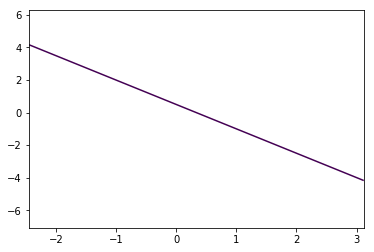

In [22]:
A = Sigma_A_1 - Sigma_A_0
B = 2*(Sigma_A_0.dot(mu0_A) - Sigma_A_1.dot(mu1_A)).transpose()
C = mu1_A.transpose().dot(Sigma_A_1).dot(mu1_A) - mu0_A.transpose().dot(Sigma_A_0).dot(mu0_A)

y,x=np.ogrid[A_train.X1.min():A_train.X1.max():100j,A_train.X2.min():A_train.X2.max():100j]
plt.contour(x.ravel(),y.ravel(),3*x+2*y,[1])
plt.show()

In [21]:
B

X1    32.088603
X2   -15.303387
dtype: float64

In [23]:
A

,X1,X2
X1,0.393769,-0.253367
X2,-0.253367,0.113912
